# Questions 6.2 Q1-Q3

In [32]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sbn
from altair import Chart, X, Y, Color, Scale
import altair as alt
from vega_datasets import data
import requests
from bs4 import BeautifulSoup
matplotlib.style.use('ggplot')

wd = pd.read_csv('world_countries.csv')

#6.2 Q1 What is the range of values for the tallest bar when creating a histogram of the literacy rate?
binned, bins = pd.cut(wd['Literacy'], bins=10, retbins=True)
counts = binned.value_counts().sort_index()

print(counts)
print(bins)

Literacy
(17.518, 25.84]      1
(25.84, 34.08]       2
(34.08, 42.32]      10
(42.32, 50.56]      10
(50.56, 58.8]       12
(58.8, 67.04]        9
(67.04, 75.28]      11
(75.28, 83.52]      18
(83.52, 91.76]      28
(91.76, 100.0]     107
Name: count, dtype: int64
[ 17.5176  25.84    34.08    42.32    50.56    58.8     67.04    75.28
  83.52    91.76   100.    ]


In [18]:
#6.2 Q2 What is the range of values for the tallest bar when creating a histogram of the fraction of the economy due to service?

binned, bins = pd.cut(wd['Service'], bins=10, retbins=True)
counts = binned.value_counts().sort_index()
print(counts)
print(bins)

Service
(0.0611, 0.151]     1
(0.151, 0.24]       3
(0.24, 0.33]       10
(0.33, 0.419]      34
(0.419, 0.508]     24
(0.508, 0.597]     48
(0.597, 0.686]     45
(0.686, 0.776]     25
(0.776, 0.865]     11
(0.865, 0.954]      8
Name: count, dtype: int64
[0.061108 0.1512   0.2404   0.3296   0.4188   0.508    0.5972   0.6864
 0.7756   0.8648   0.954   ]


In [19]:
# 6.2 Q3 Approximately how many countries (to the nearest 5) have between 90% and 100% of their economy based on service?
high_service = wd[(wd['Service'] >= 0.9) & (wd['Service'] <=1.0)]
num_high_service = len(high_service)
print(num_high_service)

6


# Questions 6.3 Q1-Q3

In [49]:
# 6.3 Q1 What is the numericCode for the country of Peru?
import requests

res = requests.get("https://restcountries.com/v2/alpha/per")
data = res.json()

print(data['name'])
print(data['numericCode'])

# 6.3 Q2 Copy and paste the list of the three-letter country codes of the countries that border Peru. Do not include the square brackets.
data['borders']


Peru
604


['BOL', 'BRA', 'CHL', 'COL', 'ECU']

In [47]:
# 6.3 Q3 How many keys are in the dictionary returned for the country of Peru?
print(data.keys())
print(len(data.keys()))


dict_keys(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes', 'capital', 'altSpellings', 'subregion', 'region', 'population', 'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders', 'nativeName', 'numericCode', 'flags', 'currencies', 'languages', 'translations', 'flag', 'regionalBlocs', 'cioc', 'independent'])
26


# Questions 6.4 Q1-Q3

In [32]:
# 6.4 Q1 How many div tags are on the page?
from bs4 import BeautifulSoup
with open(r'C:\Users\bibia\Downloads\factbook-2017\docs\notesanddefs.html', encoding='utf-8') as f:
    page = f.read()

page = BeautifulSoup(page, 'html.parser')

divs = page.select('div')
print(len(divs))



793


In [33]:
# 6.4 Q2 What kind of tag is the last tag to have the class of “cfclose”?
cfclose_tags = page.select('.cfclose')
last_cfclose = cfclose_tags[-1]
print(last_cfclose.name)

button


In [40]:
# 6.4 Q3 What is the path and filename for the file containing the data for “Internet users"?
cols = page.select("span.category")

for col in cols:
    cells = col.select('td')
    col_name = cells[0].text.strip()        
    links = cells[1].select('a')
    if links:
        fpath = links[0]['href'].split('#')[0]
        if "Internet users" in col_name:
            print(fpath)

../fields/2153.html


# Step 2: COVID-19 Dataset Analysis

1. Load the COVID-19 DataLinks to an external site. into a pandas dataframe using the URL in this link. Use the head function to display the columns and initial rows of the dataframe.
2. Note that there are multiple entries for each country. Starting from the current data frame, build a separate data frame, df_aggre, with the following properties:
    1. It contains only the columns: iso_code, continent, location, population, diabetes_prevalence, median_age, life_expectancy, total_cases, total_deaths
    2. It has only one entry/row per country (include the totals from the last entry)
    3. Any rows with missing data in any column are removed
3. Add 2 computed columns for cases_per_capita and deaths_per_capita
4. Plot histograms for 1) infections and 2) deaths. Do the same for rates of 1) infections and 2) deaths per capita.
5. Use a scatter plot matrix or multiple scatter plots to examine the correlation among the numeric variables in the data frame. Identify the pair(s) of variables among which you see a significant correlation.

In [39]:
import pandas as pd

#Step 1
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url)

df.head()

#Step 2
#keep relevant columns
df = df[['date', 'state', 'cases', 'deaths']]

#group by state and get latest row for each state
df_latest = df.sort_values("date").groupby("state").tail(1)

#aggregate cases and death by max
df_aggre = df.groupby("state").agg(
    total_cases = ("cases", "max"),
    total_deaths = ("deaths","max")
).reset_index()

df_aggre.head()

,state,total_cases,total_deaths
0,Alabama,185930,2373.0
1,Alaska,105418,526.0
2,American Samoa,5930,30.0
3,Arizona,1283590,17326.0
4,Arkansas,103939,1186.0


In [36]:
#Step 3
#placeholder population
df_aggre["population"] = 100000  

df_aggre["cases_per_capita"] = df_aggre["total_cases"] / df_aggre["population"]
df_aggre["deaths_per_capita"] = df_aggre["total_deaths"] / df_aggre["population"]

df_aggre.head()


,state,total_cases,total_deaths,population,cases_per_capita,deaths_per_capita
0,Alabama,185930,2373.0,100000,1.85930,0.02373
1,Alaska,105418,526.0,100000,1.05418,0.00526
2,American Samoa,5930,30.0,100000,0.05930,0.00030
3,Arizona,1283590,17326.0,100000,12.83590,0.17326
4,Arkansas,103939,1186.0,100000,1.03939,0.01186


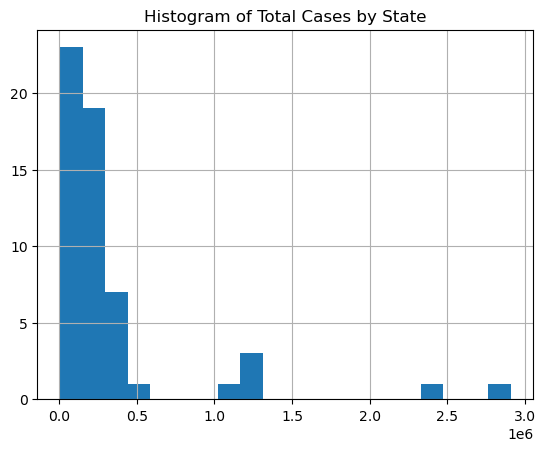

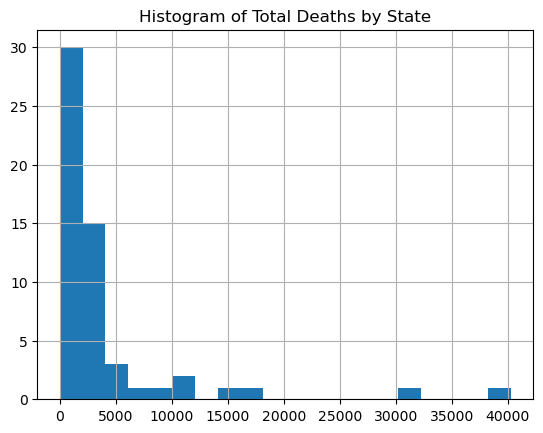

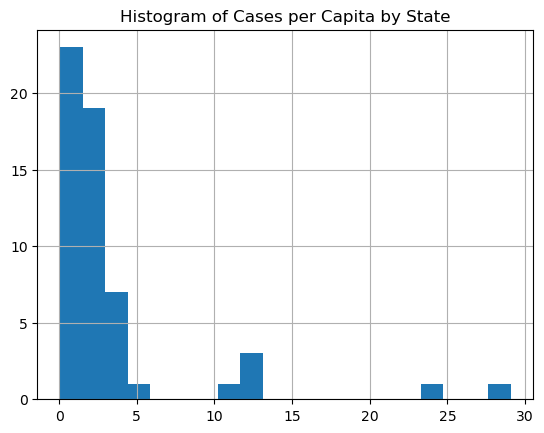

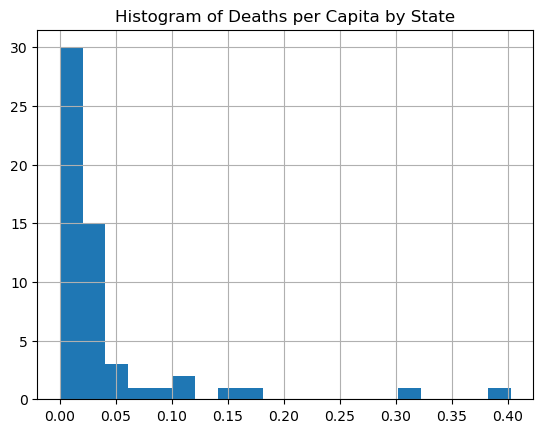

In [37]:
#Step 4
import matplotlib.pyplot as plt
df_aggre["total_cases"].hist(bins=20)

#total infections
plt.title("Histogram of Total Cases by State")
plt.show()

#total deaths
df_aggre["total_deaths"].hist(bins=20)
plt.title("Histogram of Total Deaths by State")
plt.show()

#per-capita metrics
df_aggre["cases_per_capita"].hist(bins=20)
plt.title("Histogram of Cases per Capita by State")
plt.show()

df_aggre["deaths_per_capita"].hist(bins=20)
plt.title("Histogram of Deaths per Capita by State")
plt.show()


                   total_cases  total_deaths  population  cases_per_capita  \
total_cases           1.000000      0.967744         NaN          1.000000   
total_deaths          0.967744      1.000000         NaN          0.967744   
population                 NaN           NaN         NaN               NaN   
cases_per_capita      1.000000      0.967744         NaN          1.000000   
deaths_per_capita     0.967744      1.000000         NaN          0.967744   

                   deaths_per_capita  
total_cases                 0.967744  
total_deaths                1.000000  
population                       NaN  
cases_per_capita            0.967744  
deaths_per_capita           1.000000  


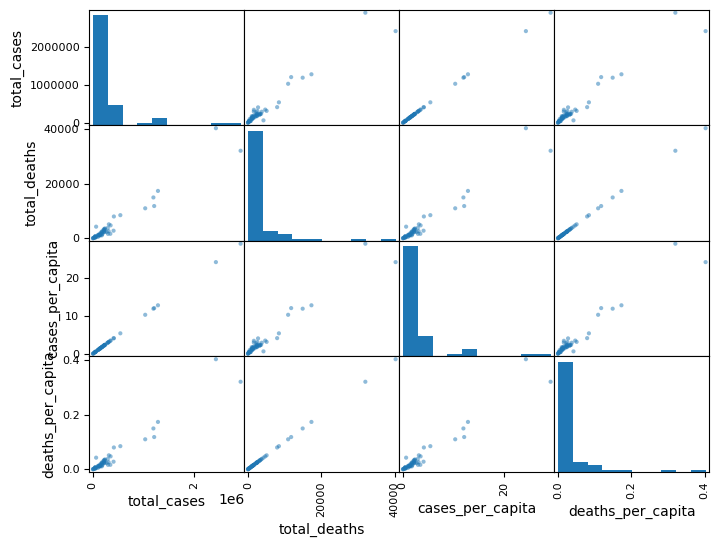

In [38]:
#Step 5
import matplotlib.pyplot as plt

#numeric correlations
corr = df_aggre.corr(numeric_only=True)
print(corr)

#scatter plot matrix
pd.plotting.scatter_matrix(
    df_aggre[["total_cases", "total_deaths", "cases_per_capita", "deaths_per_capita"]],
    figsize=(8, 6)
)
plt.show()